In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
df=pd.read_csv("Clean_Dataset.csv", index_col=0)

In [3]:
## Add departure date
df['date'] = df['days_left'].apply(lambda x: dt.date(2022, 2, 10) + dt.timedelta(days=x))
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2022-02-11
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2022-02-11
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2022-02-11
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2022-02-11
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2022-02-11
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,2022-03-31
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,2022-03-31
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,2022-03-31
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,2022-03-31


## Missing Values and Descriptive Statistics
* There is no missing values
* Numerical features: duration and price skew to the right
* Categorical features: 
    * Most flights leave from Delhi; Most flights arrive at Mumbai
    * Most flights leave in the morning; Most flights arrive at nigt
    * All most all flights have one stop

In [4]:
# Check missing values
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
date                0
dtype: int64

In [5]:
print("Date range:", min(df.date),"-",max(df.date))

Date range: 2022-02-11 00:00:00 - 2022-03-31 00:00:00


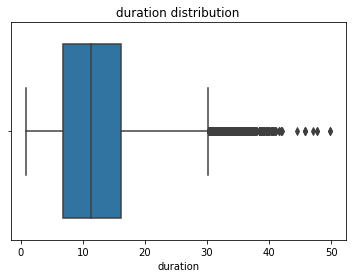

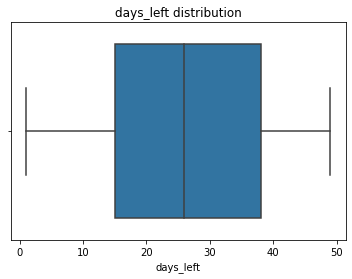

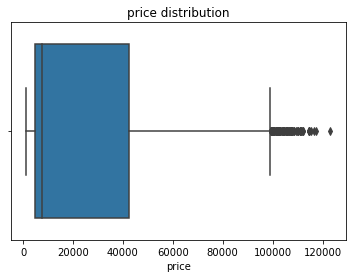

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [6]:
# Descriptive statistics and spread for three numerical variables
for i in ['duration', 'days_left','price']:
    sns.boxplot(x=i, data=df)
    plt.title(i+" distribution")
    plt.show()
df.describe()

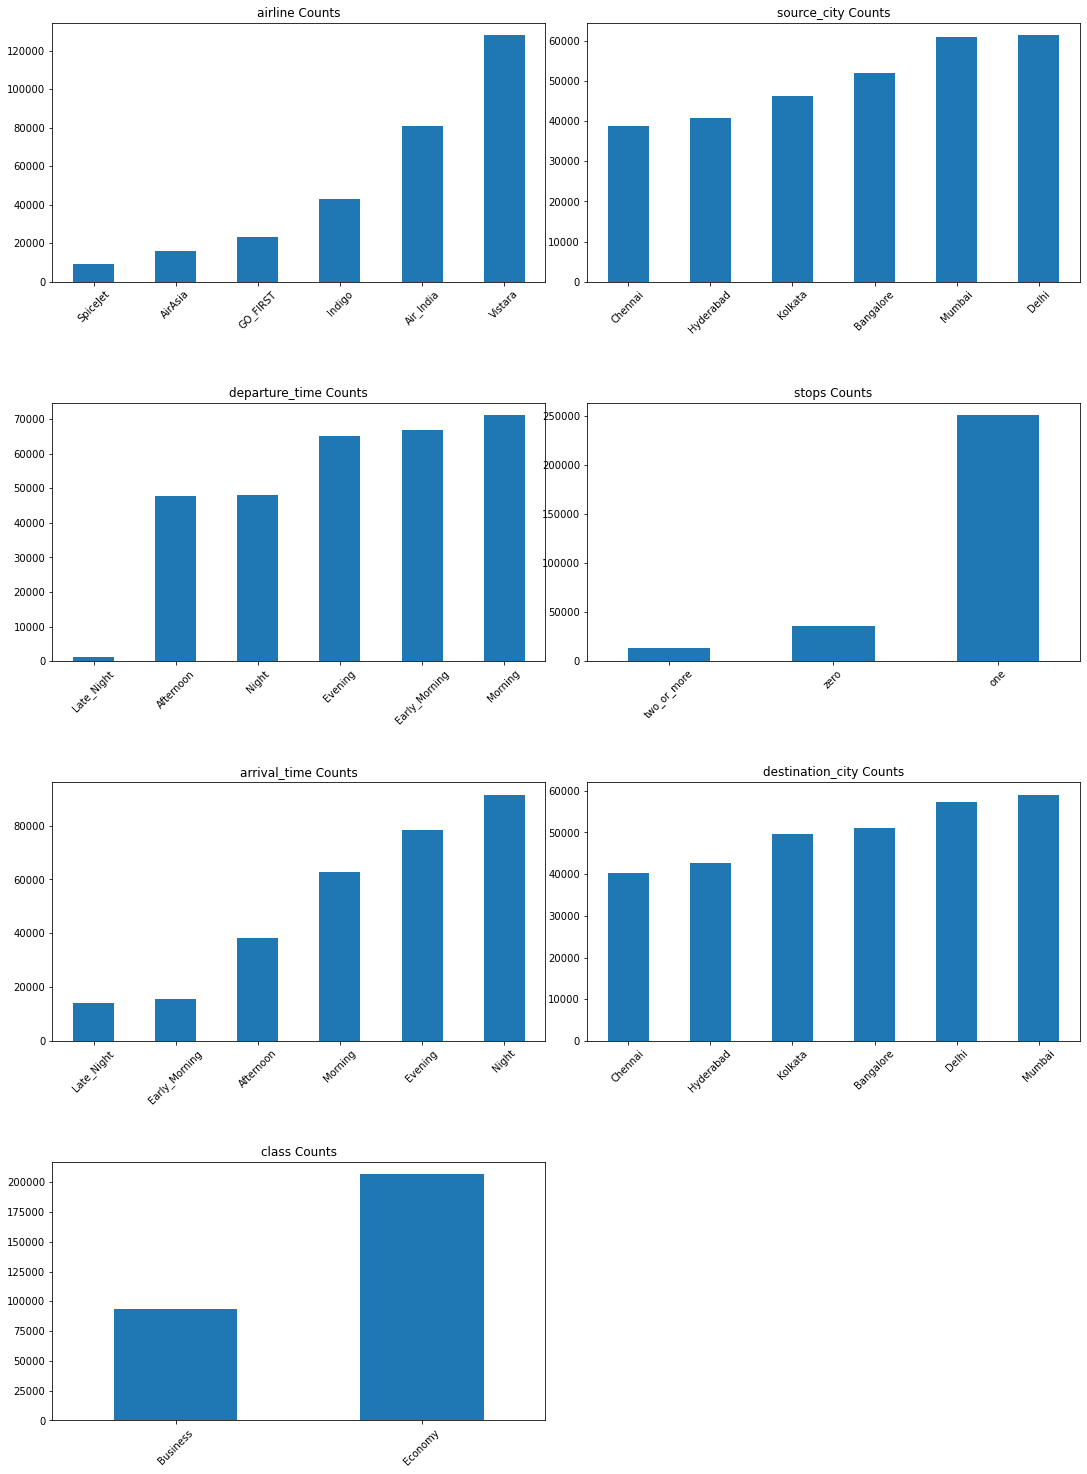

In [7]:
# Value Counts for each categorical variable
fig,ax=plt.subplots(4,2, figsize=(15,20))
fig.tight_layout(h_pad=10)
fig.delaxes(ax[3,1])
for i, ax in zip(['airline', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city','class'],ax.ravel()):
    df[i].value_counts().sort_values().plot.bar(title=i+" Counts", ax=ax)
    ax.tick_params(axis='x', rotation=45)
plt.show()

## Price Distribution by Categorical Features
* Vistara charges higher than others, and all other airlines only provide one class
* Flights to and from Delhi has the highest price charged (the price rank somehow related to the popularity of cities)
* One stop is more expensive than two stop and nonstop. 
* Flights leave in the morning or early morning is more expensive; flights leave at late night is way cheaper than other departure time
* Flights arrive at night and evening is more expensive; flights arrive at late night and early morning is cheaper

*Noted: generally there are two peaks in each price distribution, one represents economy class, another one represents business class (This is verified by the price distribution across class plot*

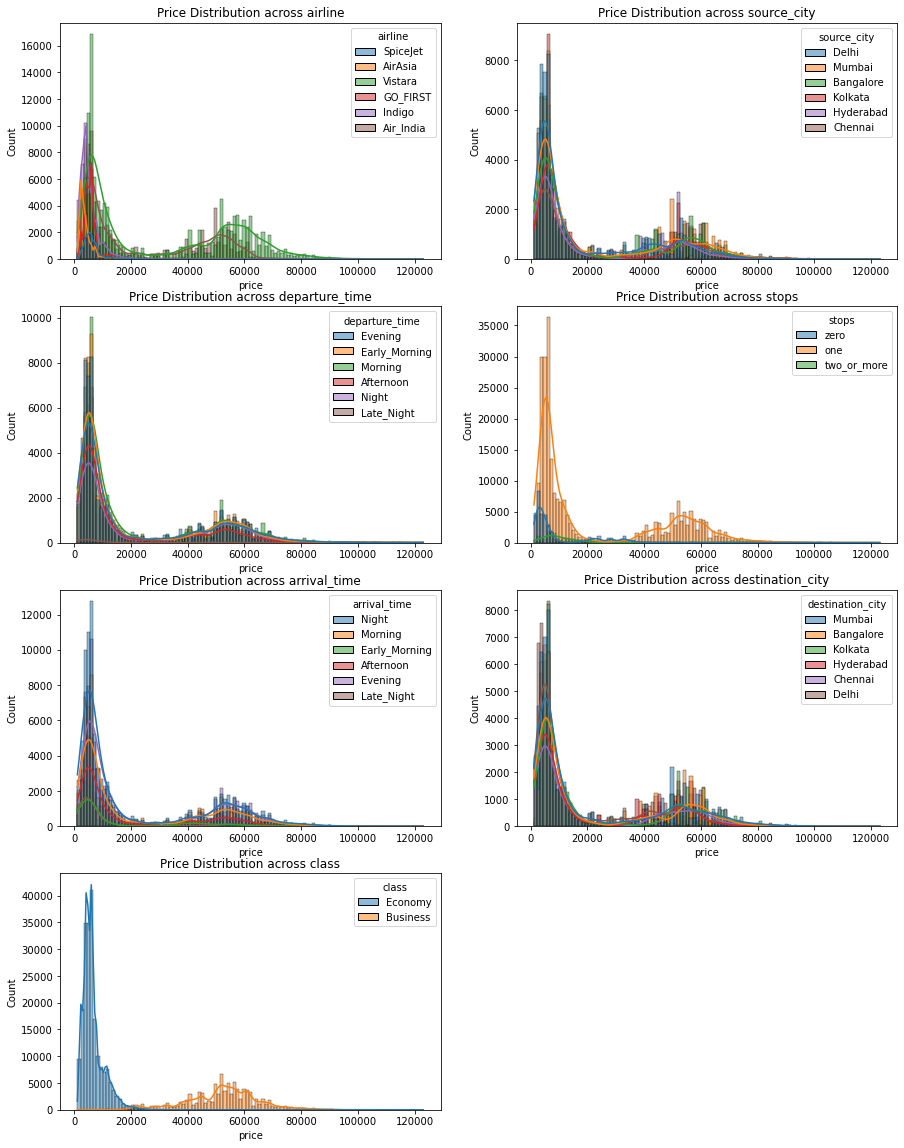

In [8]:
# Price distribution across features
fig,ax=plt.subplots(4,2, figsize=(15,20))
fig.delaxes(ax[3,1])
for i,ax in zip(['airline', 'source_city', 'departure_time', 'stops','arrival_time', 'destination_city', 'class'],ax.ravel()):
    sns.histplot(df, x='price', hue=i, kde=True, ax=ax)
    ax.set_title("Price Distribution across "+i)
plt.show()

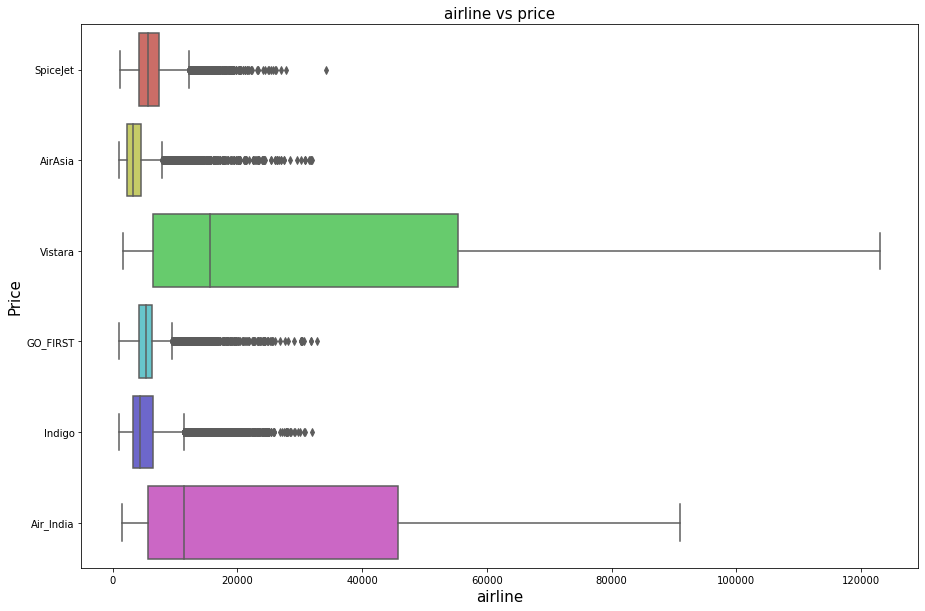

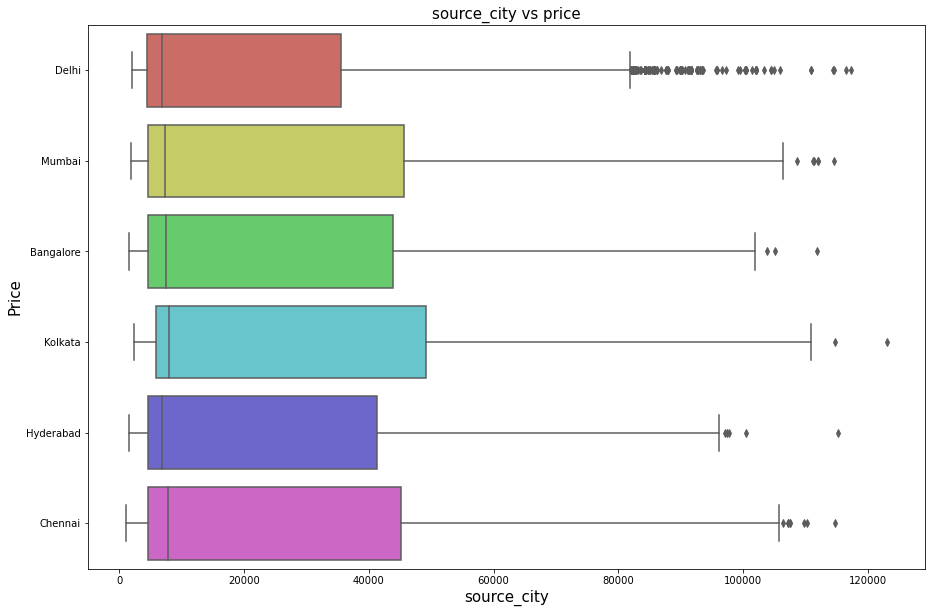

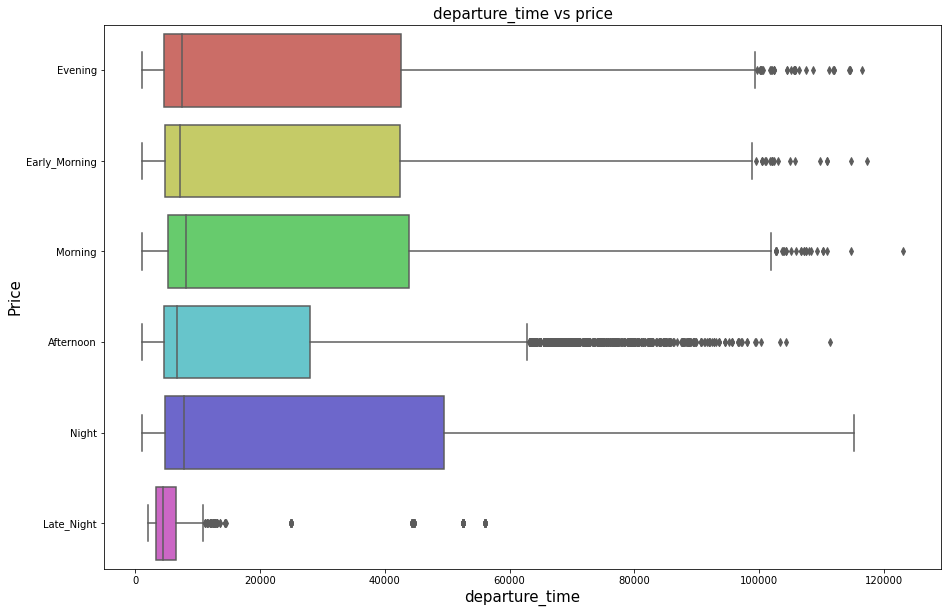

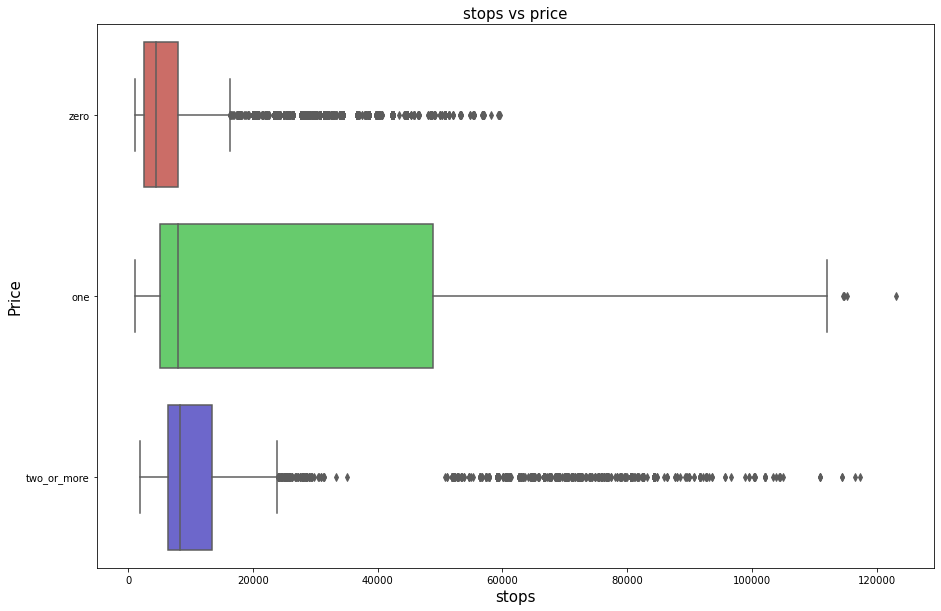

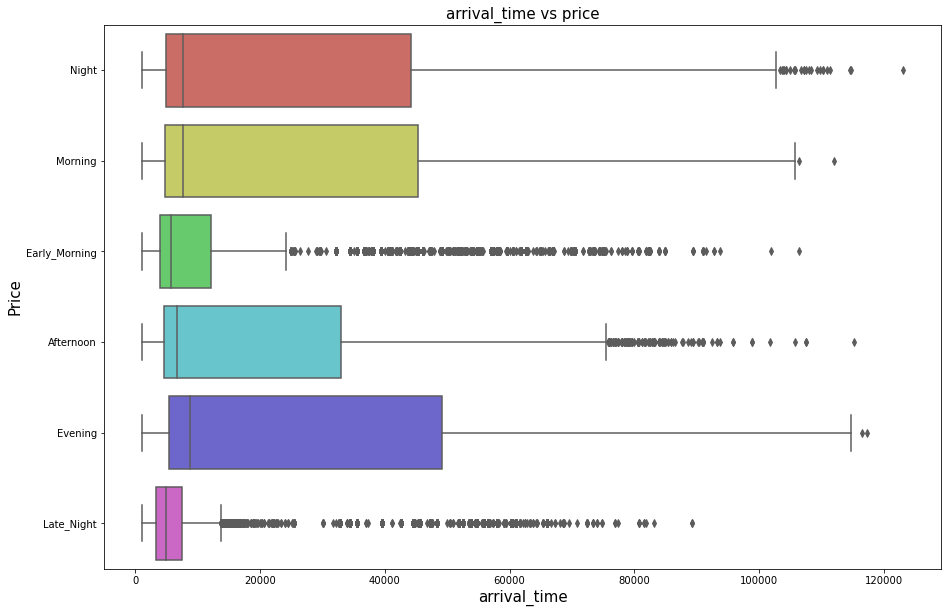

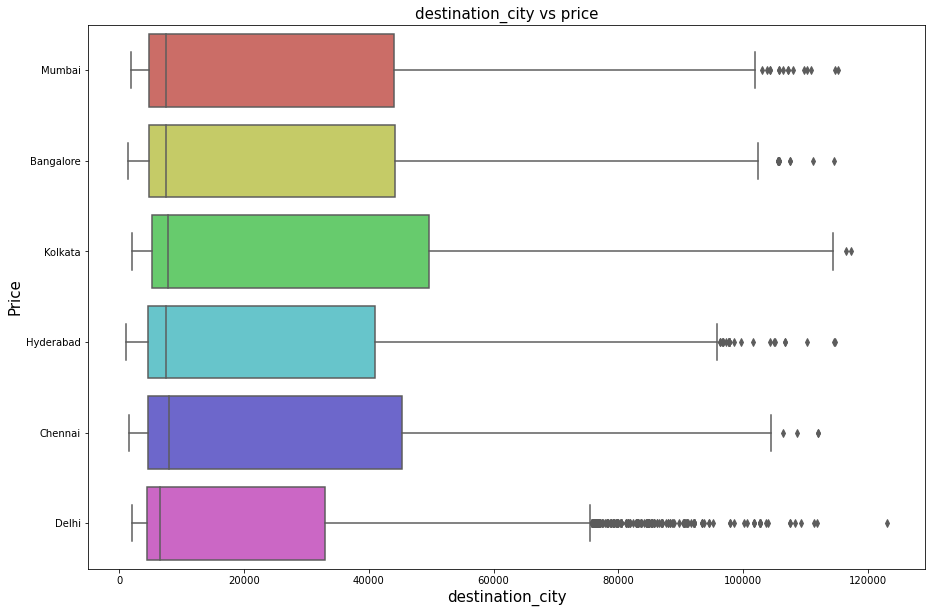

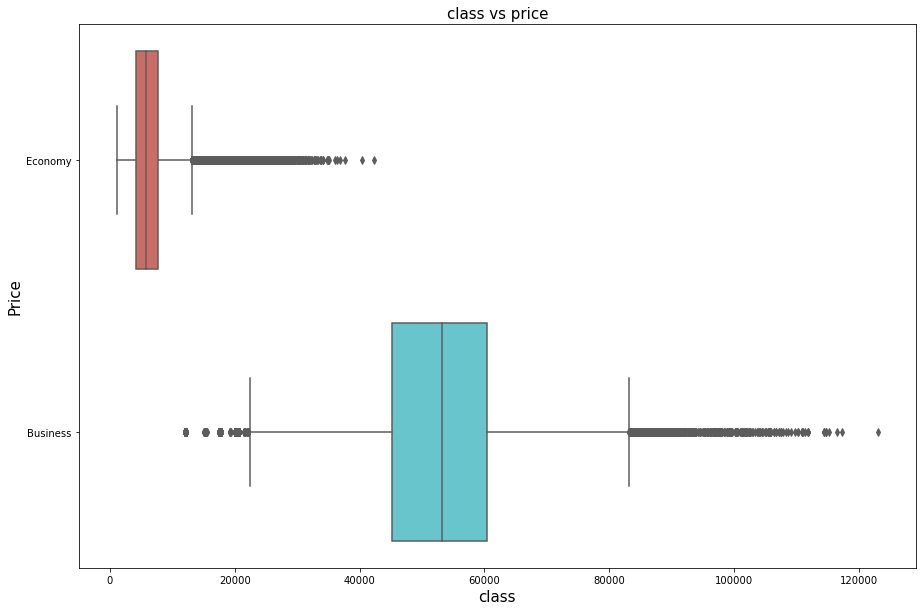

In [9]:
# price distribution vs features: boxplots
for i in df.columns[0:8]:
    if i != "flight":
        plt.figure(figsize=(15,10))
        sns.boxplot(x='price',y=i, data=df, palette='hls')
        plt.title(i+' vs price',fontsize=15)
        plt.xlabel(i ,fontsize=15)
        plt.ylabel('Price',fontsize=15)
        plt.show()

In [10]:
# Classes provided by each airline
df[["airline","class"]].value_counts()

airline    class   
Vistara    Economy     67270
           Business    60589
Air_India  Economy     47994
Indigo     Economy     43120
Air_India  Business    32898
GO_FIRST   Economy     23173
AirAsia    Economy     16098
SpiceJet   Economy      9011
dtype: int64

## Price vs Numerical Features
* Higher duration and less days left before departure increase the price with nonlinearity in the relationship
* The booking horizon spreads approximately evenly for both classes

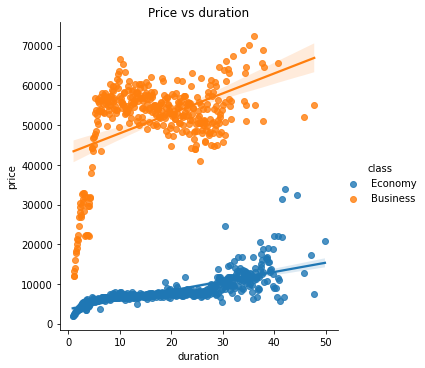

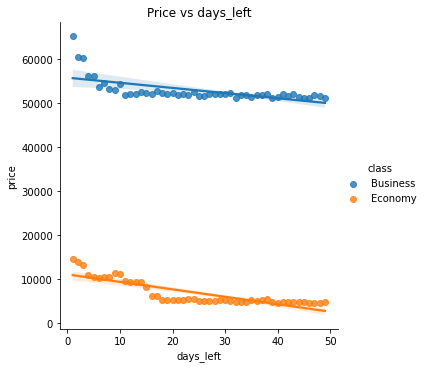

In [11]:
# Price vs Duration and Booking Horizon
for i in ['duration','days_left']:
    df_group = df[[i,"class","price"]].groupby([i,"class"]).mean().reset_index()
    sns.lmplot(x=i,y="price",hue="class",data=df_group)
    plt.title("Price vs "+i)
    plt.show()

## Price vs Datetime
* The price vs departure date shows declining trend since all data are collected on 2022-02-10, so the chart resembles the relationship between price and days_left
* The average price variates by departure day of week, where days approach to weekends will have a higher price (This is also confirmed by the avg price vs weekday graph

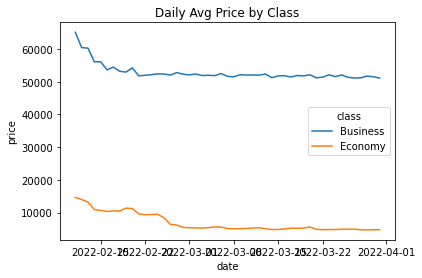

In [12]:
# price vs date
df_group=df[["date","class","price"]].groupby(["date","class"]).mean().reset_index()
sns.lineplot(x="date",y="price",hue="class",data=df_group)
plt.title("Daily Avg Price by Class")
plt.show()

In [13]:
# Create month, dow, weekday
df['DOW'] = df['date'].dt.weekday #4=Friday, 0=Monday, 6=Sunday
df["Weekday"] = df.DOW > 4 #1=Weekends
df["Weekday"] = df.Weekday.astype(int)
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date,DOW,Weekday
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2022-02-11,4,0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2022-02-11,4,0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2022-02-11,4,0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2022-02-11,4,0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2022-02-11,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,2022-03-31,3,0
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,2022-03-31,3,0
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,2022-03-31,3,0
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,2022-03-31,3,0


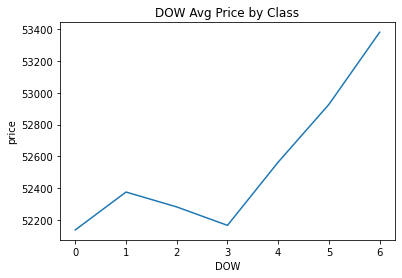

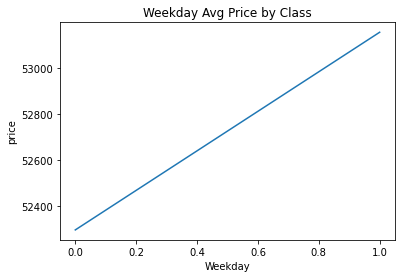

In [14]:
# price vs datetime
for i in ["DOW","Weekday"]:
    df_group=df[[i,"class","price"]].groupby([i,"class"]).mean().reset_index()
    df_group=df_group[df_group["class"]=="Business"]
    sns.lineplot(x=i,y="price",data=df_group)
    plt.title(i+" Avg Price by Class")
    plt.show()

## Data Preprocessing

In [15]:
# Subset needed columns
df_clean=df.drop(["flight","Weekday"],axis=1)
# Group airlines
df_clean["airline"] = np.where(df_clean["airline"].isin(["Vistara","Air_India"]), df["airline"], 'Other')
df_clean

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,date,DOW
0,Other,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,2022-02-11,4
1,Other,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,2022-02-11,4
2,Other,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,2022-02-11,4
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,2022-02-11,4
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,2022-02-11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265,2022-03-31,3
300149,Vistara,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105,2022-03-31,3
300150,Vistara,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099,2022-03-31,3
300151,Vistara,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585,2022-03-31,3


In [16]:
# Remove outlier: drop economy price top 10%, drop business price top and bottom 5%
business=df_clean[df_clean["class"]=="Business"]
business=business[business.price<=np.percentile(business.price,95)] # drop top 5% in business class
business=business[business.price>=np.percentile(business.price,5)] # drop bottom 5% in business class

economy=df_clean[df_clean["class"]=="Economy"]
economy=economy[economy.price<=np.percentile(economy.price,90)] # drop top 10% in economy class

df_clean=pd.concat([business, economy], axis=0)

Text(0.5, 1.0, 'Before Outlier Dropped (Business)')

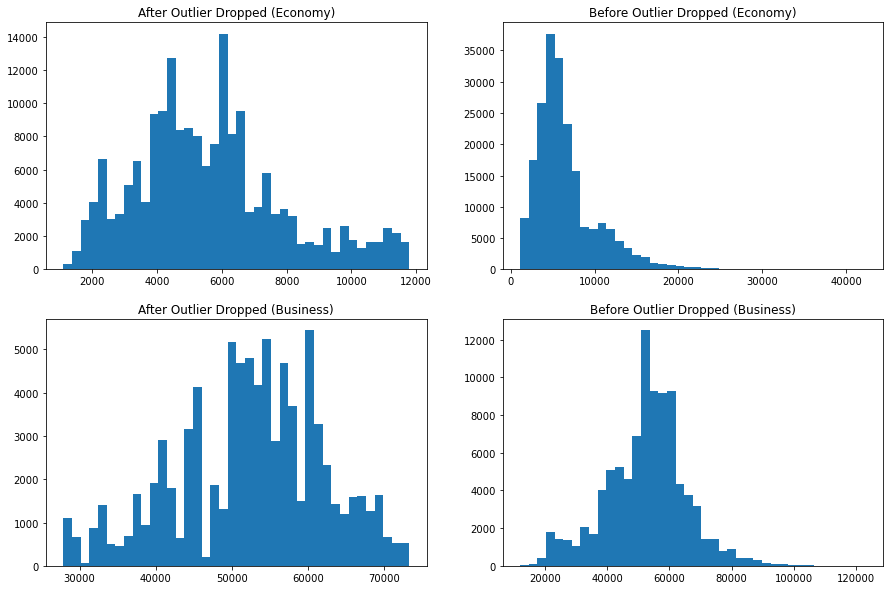

In [17]:
# Price distribution before and after outlier dropped
fig,ax=plt.subplots(2,2,figsize=(15,10))
ax[0,0].hist(economy.price,bins=40)
ax[0,0].set_title("After Outlier Dropped (Economy)")
ax[0,1].hist(df[df["class"]=="Economy"].price,bins=40)
ax[0,1].set_title("Before Outlier Dropped (Economy)")

ax[1,0].hist(business.price,bins=40)
ax[1,0].set_title("After Outlier Dropped (Business)")
ax[1,1].hist(df[df["class"]=="Business"].price,bins=40)
ax[1,1].set_title("Before Outlier Dropped (Business)")

In [17]:
df_clean.to_csv("preprocessed.csv")